In [ ]:

import shutil

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)

from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
tf.compat.v1.disable_v2_behavior
from tensorflow import keras
from tensorflow.keras.utils import to_categorical # used for converting labels to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Resizing and Train ,test and vadidation Split

In [ ]:
from tensorflow.python.ops.linalg_ops import norm_v2
import glob
akiec = glob.glob('/content/drive/MyDrive/Reorg/akiec/*.*')
bcc = glob.glob('/content/drive/MyDrive/Reorg/bcc/*.*')
bkl= glob.glob('/content/drive/MyDrive/Reorg/bkl/*.*')
df = glob.glob('/content/drive/MyDrive/Reorg/df/*.*')
mel = glob.glob('/content/drive/MyDrive/Reorg/mel/*.*')
nv = glob.glob('/content/drive/MyDrive/Reorg/nv/*.*')
vasc = glob.glob('/content/drive/MyDrive/Reorg/vasc/*.*')
data = []
labels = []

for i in akiec:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in bcc:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in bkl:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in df:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in mel:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(4)
for i in nv:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(5)
for i in vasc:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(6)
data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.1)

In [ ]:
X1_train=X_train/255

In [ ]:
X1_train

array([[[[0.56470588, 0.46666667, 0.48235294],
         [0.56078431, 0.4627451 , 0.47843137],
         [0.57647059, 0.47843137, 0.49411765],
         ...,
         [0.64313725, 0.57647059, 0.6       ],
         [0.63921569, 0.57254902, 0.59607843],
         [0.62352941, 0.56078431, 0.56470588]],

        [[0.57254902, 0.4745098 , 0.49019608],
         [0.56862745, 0.47058824, 0.48627451],
         [0.57647059, 0.47843137, 0.49411765],
         ...,
         [0.64705882, 0.58039216, 0.60392157],
         [0.63921569, 0.57254902, 0.59607843],
         [0.62745098, 0.56470588, 0.56862745]],

        [[0.56862745, 0.47058824, 0.48627451],
         [0.58039216, 0.48235294, 0.49803922],
         [0.58823529, 0.49019608, 0.50588235],
         ...,
         [0.65098039, 0.58823529, 0.6       ],
         [0.64313725, 0.58039216, 0.59215686],
         [0.63921569, 0.57647059, 0.58823529]],

        ...,

        [[0.60784314, 0.53333333, 0.54117647],
         [0.61176471, 0.54901961, 0.55294118]

In [ ]:
X_train

array([[[[144, 119, 123],
         [143, 118, 122],
         [147, 122, 126],
         ...,
         [164, 147, 153],
         [163, 146, 152],
         [159, 143, 144]],

        [[146, 121, 125],
         [145, 120, 124],
         [147, 122, 126],
         ...,
         [165, 148, 154],
         [163, 146, 152],
         [160, 144, 145]],

        [[145, 120, 124],
         [148, 123, 127],
         [150, 125, 129],
         ...,
         [166, 150, 153],
         [164, 148, 151],
         [163, 147, 150]],

        ...,

        [[155, 136, 138],
         [156, 140, 141],
         [157, 141, 142],
         ...,
         [164, 142, 144],
         [163, 143, 144],
         [162, 142, 144]],

        [[156, 136, 138],
         [157, 138, 140],
         [156, 142, 142],
         ...,
         [162, 142, 143],
         [160, 135, 138],
         [161, 134, 139]],

        [[155, 136, 138],
         [155, 136, 138],
         [156, 140, 141],
         ...,
         [163, 141, 143],
        

In [ ]:
x_test=X_test/255

In [ ]:
y_train = to_categorical(ytrain, num_classes = 7)
y_test = to_categorical(ytest, num_classes = 7)


In [ ]:

#Splitting training into Train and Validate sets
x_train, x_validate, y_train, y_validate = train_test_split(X1_train, y_train, test_size = 0.1)



# Saving train, test,validation splits in the form of numpy arrays(Dataset2)

In [ ]:

np.save('/content/drive/MyDrive/SAVE1/x_test.npy', x_test)
np.save('/content/drive/MyDrive/SAVE1/y_test.npy', y_test)

In [ ]:
np.save('/content/drive/MyDrive/SAVE1/y_train.npy', y_train)

In [ ]:
np.save('/content/drive/MyDrive/SAVE1/x_train.npy', x_train)

In [ ]:
np.save('/content/drive/MyDrive/SAVE1/x_validate.npy', x_validate)
np.save('/content/drive/MyDrive/SAVE1/y_validate.npy', y_validate)

# Loading train, test,validation splits(Dataset2)


In [ ]:
y1_train = np.load("/content/drive/MyDrive/SAVE1/y_train.npy")


In [ ]:
x1_train = np.load("/content/drive/MyDrive/SAVE1/x_train.npy")

In [ ]:
x1_validate = np.load("/content/drive/MyDrive/SAVE1/x_validate.npy")


In [ ]:
y1_validate = np.load("/content/drive/MyDrive/SAVE1/y_validate.npy")

In [ ]:
x1_test = np.load("/content/drive/MyDrive/SAVE1/x_test.npy")
y1_test = np.load("/content/drive/MyDrive/SAVE1/y_test.npy")

# Saving train, test,validation splits in the form of numpy arrays(Dataset1)

In [ ]:

np.save('/content/drive/MyDrive/SAVE/x_test.npy', x_test)
np.save('/content/drive/MyDrive/SAVE/y_test.npy', y_test)

In [ ]:
np.save('/content/drive/MyDrive/SAVE/y_train.npy', y_train)

In [ ]:
np.save('/content/drive/MyDrive/SAVE/x_train.npy', x_train)

In [ ]:
np.save('/content/drive/MyDrive/SAVE/x_validate.npy', x_validate)
np.save('/content/drive/MyDrive/SAVE/y_validate.npy', y_validate)

# Loading train, test,validation splits(Dataset1)


In [ ]:
y1_train = np.load("/content/drive/MyDrive/SAVE/y_train.npy")


In [ ]:
x1_train = np.load("/content/drive/MyDrive/SAVE/x_train.npy")

In [ ]:
x1_validate = np.load("/content/drive/MyDrive/SAVE/x_validate.npy")


In [ ]:
y1_validate = np.load("/content/drive/MyDrive/SAVE/y_validate.npy")

In [ ]:
x1_test = np.load("/content/drive/MyDrive/SAVE/x_test.npy")
y1_test = np.load("/content/drive/MyDrive/SAVE/y_test.npy")

# Xception

In [ ]:
from tensorflow.keras.layers import AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,Add
from tensorflow.keras.layers import SeparableConv2D,ReLU
from tensorflow.keras.layers import BatchNormalization,MaxPool2D
from tensorflow.keras.layers import GlobalAvgPool2D
from tensorflow.keras import Model
# creating the Conv-Batch Norm block

def conv_bn(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=strides,
               padding='same',
               use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

In [ ]:
#import necessary libraries


# creating separableConv-Batch Norm block

def sep_bn(x, filters, kernel_size, strides=1):
    
    x = SeparableConv2D(filters=filters, 
                        kernel_size = kernel_size, 
                        strides=strides, 
                        padding = 'same', 
                        use_bias = False)(x)
    x = BatchNormalization()(x)
    return x
# entry flow

def entry_flow(x):
    
    x = conv_bn(x, filters =32, kernel_size =3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters =64, kernel_size =3, strides=1)
    tensor = ReLU()(x)
    
    x = sep_bn(tensor, filters = 128, kernel_size =3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 128, kernel_size =3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=128, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=256, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=728, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    return x
# middle flow

def middle_flow(tensor):
    
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        
        tensor = Add()([tensor,x])
       
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        
        tensor = Add()([tensor,x])

        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
       
        tensor = Add()([tensor,x])
        
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        tensor = Add()([tensor,x])

        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        tensor = Add()([tensor,x])
        
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        tensor = Add()([tensor,x])
        
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        tensor = Add()([tensor,x])

        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        tensor = Add()([tensor,x])

       
        return tensor
# exit flow

def exit_flow(tensor):
    
    x = ReLU()(tensor)
    x = sep_bn(x, filters = 728,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 1024,  kernel_size=3)
    x = MaxPool2D(pool_size = 3, strides = 2, padding ='same')(x)
    
    tensor = conv_bn(tensor, filters =1024, kernel_size=1, strides =2)
    x = Add()([tensor,x])
    
    x = sep_bn(x, filters = 1536,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 2048,  kernel_size=3)
    x = GlobalAvgPool2D()(x)
    
    x = Dense (units = 512, activation = 'relu')(x)
    x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
    x = Dense(7, activation='softmax')(x)
    
    return x
# model code

input = Input(shape = (256,256,3))
x = entry_flow(input)
x = middle_flow(x)
output = exit_flow(x)

model1 = Model (inputs=input, outputs=output)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

# Compiling Xception Model

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer = SGD(lr=0.001, momentum=15, decay=0.0, nesterov=False)
# Compile the model
model1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Data Augmentation during training

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [ ]:
datagen1 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

# Training the Xception model for 40 Epochs

In [ ]:
datagen1.fit(x_train)
## Fit the model
epochs = 40
batch_size = 64

datagen1.fit(x_validate)
history = model1.fit(datagen1.flow(x_train,y_train, batch_size=batch_size),verbose = 1,
                              epochs = epochs, validation_data = datagen1.flow(x_validate,y_validate),callbacks=[learning_rate_reduction])

Epoch 1/40
128/128 [==============================] - 113s 875ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.3113 - val_accuracy: 0.9361 - lr: 3.1250e-05
Epoch 2/40
128/128 [==============================] - 112s 871ms/step - loss: 7.6274e-04 - accuracy: 0.9998 - val_loss: 0.3083 - val_accuracy: 0.9427 - lr: 3.1250e-05
Epoch 3/40
128/128 [==============================] - 113s 877ms/step - loss: 9.2214e-04 - accuracy: 0.9999 - val_loss: 0.2797 - val_accuracy: 0.9460 - lr: 3.1250e-05
Epoch 4/40
128/128 [==============================] - 115s 896ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.3131 - val_accuracy: 0.9361 - lr: 3.1250e-05
Epoch 5/40
128/128 [==============================] - 114s 884ms/step - loss: 9.0086e-04 - accuracy: 0.9999 - val_loss: 0.3500 - val_accuracy: 0.9350 - lr: 3.1250e-05
Epoch 6/40
128/128 [==============================] - ETA: 0s - loss: 7.8170e-04 - accuracy: 0.9998
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-

# Saving the Trained Xception Model

In [ ]:
model1.save("/content/drive/MyDrive/Xception94.h5")

In [ ]:
model1.save("/content/drive/MyDrive/Xception93.h5")

# Confusion matrix

In [ ]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

29/29 [==============================] - 2s 31ms/step
Classification report for classifier <keras.engine.functional.Functional object at 0x7fb8040344c0>:
              precision    recall  f1-score   support

     class 0       0.69      0.42      0.52       122
     class 1       0.67      0.54      0.60       133
     class 2       0.45      0.63      0.53       135
     class 3       0.75      0.75      0.75       138
     class 4       0.46      0.35      0.40       145
     class 5       0.52      0.80      0.63       118
     class 6       0.94      0.88      0.91       117

    accuracy                           0.62       908
   macro avg       0.64      0.62      0.62       908
weighted avg       0.63      0.62      0.61       908




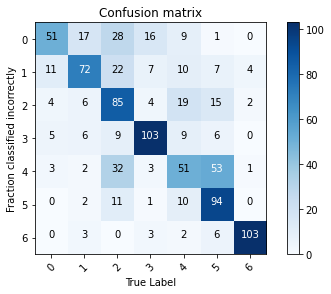

In [ ]:
from sklearn import metrics
# Predict the values from the validation dataset
Y_pred = model.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

#Show Classification report
target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 
                'class 5', 'class 6']
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))

# train,validation accuracy and loss graphs

Text(0.5, 1.0, 'Training and validation loss')

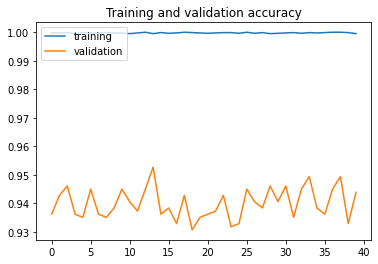

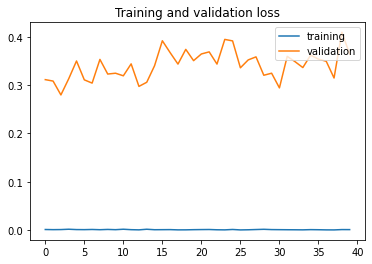

In [ ]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(accuracy))

# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy, label = "training")
plt.plot(epochs, val_accuracy, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

# predicting images from test and validation datasets

In [ ]:
loss, accuracy = model1.evaluate(x_test, y_test, verbose=0)
loss_v, accuracy_v = model1.evaluate(x_validate, y_validate, verbose=0)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.954846  ;  loss_v = 0.294120
Test: accuracy = 0.949455  ;  loss = 0.332440


# Densenet201

In [ ]:
import tensorflow
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, \
     Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

def densenet(input_shape, n_classes, filters = 32):
    

    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,48,32]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    x = GlobalAveragePooling2D()(d)
 
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model2 = Model(input, output)
    return model2
input_shape = 256, 256, 3
n_classes = 7
model2 = densenet(input_shape,n_classes)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 128, 128, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 64, 64, 64)  0           ['conv2d_6[0][0]']               
                                                                                            

# Data Augmentation during training

In [ ]:
datagen2 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [ ]:
datagen3 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

# Compiling Densenet201 Model

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer = SGD(lr=0.001, momentum=15, decay=0.0, nesterov=False)
# Compile the model
model2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Training the Densenet201 model for 40 Epochs

In [ ]:
datagen3.fit(x_train)
## Fit the model
epochs = 40
batch_size = 64

datagen3.fit(x_validate)
history = model2.fit(datagen3.flow(x_train,y_train, batch_size=batch_size),verbose = 1,
                              epochs = epochs, validation_data = datagen3.flow(x_validate,y_validate),callbacks=[learning_rate_reduction])

Epoch 1/40
118/118 [==============================] - 102s 862ms/step - loss: 0.0924 - accuracy: 0.9701 - val_loss: 0.7555 - val_accuracy: 0.8086 - lr: 1.5625e-05
Epoch 2/40
118/118 [==============================] - 102s 861ms/step - loss: 0.0905 - accuracy: 0.9678 - val_loss: 0.7514 - val_accuracy: 0.8170 - lr: 1.5625e-05
Epoch 3/40
118/118 [==============================] - 101s 857ms/step - loss: 0.0886 - accuracy: 0.9688 - val_loss: 0.7770 - val_accuracy: 0.8206 - lr: 1.5625e-05
Epoch 4/40
118/118 [==============================] - 101s 854ms/step - loss: 0.0817 - accuracy: 0.9726 - val_loss: 0.7407 - val_accuracy: 0.8218 - lr: 1.5625e-05
Epoch 5/40
118/118 [==============================] - 102s 863ms/step - loss: 0.0789 - accuracy: 0.9724 - val_loss: 0.7515 - val_accuracy: 0.8158 - lr: 1.5625e-05
Epoch 6/40
118/118 [==============================] - 101s 858ms/step - loss: 0.0739 - accuracy: 0.9737 - val_loss: 0.8195 - val_accuracy: 0.8254 - lr: 1.5625e-05
Epoch 7/40
118/118 [==

# Saving the Trained Densenet201 Model

In [ ]:
model2.save("/content/drive/MyDrive/Dense82.h5")

# Loading the weights of trained densenet201

In [ ]:
model2.load_weights("/content/drive/MyDrive/Dense82.h5")

In [ ]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 128, 128, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 64, 64, 64)  0           ['conv2d_6[0][0]']               
                                                                                            

# Defining SoftAttention

In [ ]:

#Soft Attention

from keras import backend as K
from keras.layers import Layer,InputSpec
import keras.layers as kl
import tensorflow as tf



class SoftAttention(Layer):
    def __init__(self,ch,m,concat_with_x=False,aggregate=False,**kwargs):
        self.channels=int(ch)
        self.multiheads = m
        self.aggregate_channels = aggregate
        self.concat_input_with_scaled = concat_with_x

        
        super(SoftAttention,self).__init__(**kwargs)

    def build(self,input_shape):

        self.i_shape = input_shape

        kernel_shape_conv3d = (self.channels, 3, 3) + (1, self.multiheads) # DHWC
    
        self.out_attention_maps_shape = input_shape[0:1]+(self.multiheads,)+input_shape[1:-1]
        
        if self.aggregate_channels==False:

            self.out_features_shape = input_shape[:-1]+(input_shape[-1]+(input_shape[-1]*self.multiheads),)
        else:
            if self.concat_input_with_scaled:
                self.out_features_shape = input_shape[:-1]+(input_shape[-1]*2,)
            else:
                self.out_features_shape = input_shape
        

        self.kernel_conv3d = self.add_weight(shape=kernel_shape_conv3d,
                                        initializer='he_uniform',
                                        name='kernel_conv3d')
        self.bias_conv3d = self.add_weight(shape=(self.multiheads,),
                                      initializer='zeros',
                                      name='bias_conv3d')

        super(SoftAttention, self).build(input_shape)

    def call(self, x):

        exp_x = K.expand_dims(x,axis=-1)

        c3d = K.conv3d(exp_x,
                     kernel=self.kernel_conv3d,
                     strides=(1,1,self.i_shape[-1]), padding='same', data_format='channels_last')
        conv3d = K.bias_add(c3d,
                        self.bias_conv3d)
        conv3d = kl.Activation('relu')(conv3d)

        conv3d = K.permute_dimensions(conv3d,pattern=(0,4,1,2,3))

        
        conv3d = K.squeeze(conv3d, axis=-1)
        conv3d = K.reshape(conv3d,shape=(-1, self.multiheads ,self.i_shape[1]*self.i_shape[2]))

        softmax_alpha = K.softmax(conv3d, axis=-1) 
        softmax_alpha = kl.Reshape(target_shape=(self.multiheads, self.i_shape[1],self.i_shape[2]))(softmax_alpha)

        
        if self.aggregate_channels==False:
            exp_softmax_alpha = K.expand_dims(softmax_alpha, axis=-1)       
            exp_softmax_alpha = K.permute_dimensions(exp_softmax_alpha,pattern=(0,2,3,1,4))
   
            x_exp = K.expand_dims(x,axis=-2)
   
            u = kl.Multiply()([exp_softmax_alpha, x_exp])   
  
            u = kl.Reshape(target_shape=(self.i_shape[1],self.i_shape[2],u.shape[-1]*u.shape[-2]))(u)

        else:
            exp_softmax_alpha = K.permute_dimensions(softmax_alpha,pattern=(0,2,3,1))

            exp_softmax_alpha = K.sum(exp_softmax_alpha,axis=-1)

            exp_softmax_alpha = K.expand_dims(exp_softmax_alpha, axis=-1)

            u = kl.Multiply()([exp_softmax_alpha, x])   

        if self.concat_input_with_scaled:
            o = kl.Concatenate(axis=-1)([u,x])
        else:
            o = u
        
        return [o, softmax_alpha]

    def compute_output_shape(self, input_shape): 
        return [self.out_features_shape, self.out_attention_maps_shape]

    
    def get_config(self):
        return super(SoftAttention,self).get_config()

# Removing last 28 layers of Densenet201 and adding softattention layers at the end of Densenet201 

In [ ]:
conv = model2.layers[-28].output

In [ ]:
attention_layer,map2 = SoftAttention(aggregate=True,m=16,concat_with_x=False,ch=int(conv.shape[-1]),name='soft_attention')(conv)
attention_layer=(MaxPooling2D(pool_size=(2, 2),padding="same")(attention_layer))
conv=(MaxPooling2D(pool_size=(2, 2),padding="same")(conv))

conv = concatenate([conv,attention_layer])
conv  = Activation('relu')(conv)
conv = Dropout(0.5)(conv)


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from keras import backend as K
from keras.layers import Layer,InputSpec
import keras.layers as kl
from glob import glob
from sklearn.metrics import roc_curve, auc
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_auc_score
from tensorflow.keras import callbacks 
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from  matplotlib import pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate,Dense, Conv2D, MaxPooling2D, Flatten,Input,Activation,add,AveragePooling2D,BatchNormalization,Dropout
%matplotlib inline
import shutil
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
output = Flatten()(conv)
output = Dense(7, activation='softmax')(output)
model3 = Model(inputs=model2.input, outputs=output)

In [ ]:

model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 128, 128, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 64, 64, 64)  0           ['conv2d_6[0][0]']               
                                                                                            

# Compiling Soft attention Densenet201 Model

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer = SGD(lr=0.001, momentum=15, decay=0.0, nesterov=False)
# Compile the model
model3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Training the Soft attention Densenet201 model for 40 Epochs

In [ ]:
datagen2.fit(x1_train)
## Fit the model
epochs = 40
batch_size = 64

datagen2.fit(x1_validate)
history = model3.fit(datagen2.flow(x1_train,y1_train, batch_size=batch_size),verbose = 1,
                              epochs = epochs, validation_data = datagen2.flow(x1_validate,y1_validate),callbacks=[learning_rate_reduction])

Epoch 1/40
128/128 [==============================] - 116s 904ms/step - loss: 0.4477 - accuracy: 0.9105 - val_loss: 0.3136 - val_accuracy: 0.9163 - lr: 1.0000e-05
Epoch 2/40
128/128 [==============================] - 113s 881ms/step - loss: 0.2898 - accuracy: 0.9219 - val_loss: 0.2455 - val_accuracy: 0.9328 - lr: 1.0000e-05
Epoch 3/40
128/128 [==============================] - 113s 879ms/step - loss: 0.2426 - accuracy: 0.9267 - val_loss: 0.2533 - val_accuracy: 0.9262 - lr: 1.0000e-05
Epoch 4/40
128/128 [==============================] - 113s 881ms/step - loss: 0.2169 - accuracy: 0.9289 - val_loss: 0.2431 - val_accuracy: 0.9240 - lr: 1.0000e-05
Epoch 5/40
128/128 [==============================] - 112s 875ms/step - loss: 0.2073 - accuracy: 0.9323 - val_loss: 0.2316 - val_accuracy: 0.9251 - lr: 1.0000e-05
Epoch 6/40
128/128 [==============================] - 112s 875ms/step - loss: 0.1933 - accuracy: 0.9342 - val_loss: 0.2320 - val_accuracy: 0.9240 - lr: 1.0000e-05
Epoch 7/40
128/128 [==

In [ ]:
model3.save("/content/drive/MyDrive/DenseSA94.h5")

# Confusion Matrix

In [ ]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

27/27 [==============================] - 5s 48ms/step
Classification report for classifier <keras.engine.functional.Functional object at 0x7f4328839af0>:
              precision    recall  f1-score   support

     class 0       0.93      0.98      0.95       117
     class 1       0.96      0.96      0.96       106
     class 2       0.83      0.84      0.84       125
     class 3       0.98      1.00      0.99       122
     class 4       0.91      0.89      0.90       141
     class 5       0.82      0.77      0.79       103
     class 6       0.99      0.99      0.99       122

    accuracy                           0.92       836
   macro avg       0.92      0.92      0.92       836
weighted avg       0.92      0.92      0.92       836




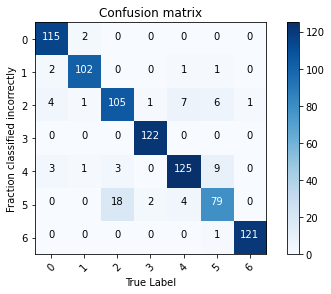

In [ ]:
from sklearn import metrics
# Predict the values from the validation dataset
Y_pred = model3.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

#Show Classification report
target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 
                'class 5', 'class 6']
print("Classification report for classifier %s:\n%s\n"
      % (model3, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))

# train,validation accuracy and loss graphs

Text(0.5, 1.0, 'Training and validation loss')

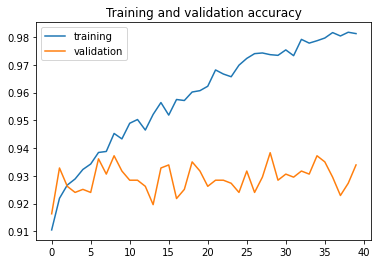

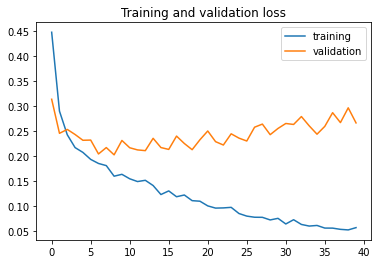

In [ ]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(accuracy))

# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy, label = "training")
plt.plot(epochs, val_accuracy, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

# predicting images from test and validation datasets

In [ ]:
loss, accuracy = model3.evaluate(x1_test, y1_test, verbose=0)
loss_v, accuracy_v = model3.evaluate(x1_validate, y1_validate, verbose=0)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.942731  ;  loss_v = 0.255751
Test: accuracy = 0.942517  ;  loss = 0.219353


In [ ]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:

%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/drive/MyDrive/Xception96(98t).h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Skin Cancer Detection
         """
         )

file = st.file_uploader("Please upload an image of skin ", type=["jpg", "png","jpeg","jfif"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (256,256)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
       
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       
        img_resize = image/255.
        
        img_reshape = img_resize[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names=[[1., 0., 0., 0., 0., 0., 0.],
[0., 1., 0., 0., 0., 0., 0.],
[0., 0., 1., 0., 0., 0., 0.],
[0., 0., 0., 1., 0., 0., 0.],
[0., 0., 0., 0., 1., 0., 0.],
[0., 0., 0., 0., 0., 1., 0.],
[0., 0., 0., 0., 0., 0., 1.]]

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])
    st.write(predicted_class)
    st.write(confidence)


    
    #print( "class": predicted_class,"confidence": float(confidence))



Overwriting app.py


In [15]:

!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
pip install protobuf==3.20.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!ngrok authtoken 2J0KSN590Ju0IDOHKxHfxczLu9K_PUsUvwa7CCkjNyi29Dug

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [18]:

!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [25]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-12-27 17:18:38--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 54.161.241.46, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.19M  6.53MB/s    in 2.0s    

2022-12-27 17:18:41 (6.53 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13832437/13832437]



In [26]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [30]:
get_ipython().system_raw('./ngrok http 8501 &')

In [31]:

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://11a2-35-229-173-214.ngrok.io


In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.173.214:8501

2022-12-27 17:19:16.693038: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
1/1 [==============================] - 0s 222ms/step
